# Improving Model Accuracy

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Data Science Software
VimeoVideo('647548306', width=720, height=480)

https://vimeo.com/647548306

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pd.options.display.max_columns = 1000
from sklearn.model_selection import RandomizedSearchCV

## Load in Data

In [2]:
telcomChurn = pd.read_csv('telcomChurn.csv')
telcomChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Wrangling

### Drop or Recode anything that isn't a number or that isn't useful

### Dropping Customer ID because it is a unique identifier and not a helpful qualifier

In [3]:
telcomChurn1 = telcomChurn.drop('customerID', axis=1)

In [4]:
telcomChurn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Recode the rest

In [5]:
def gender (series): 
    if series == "Male":
        return 0
    if series == "Female": 
        return 1
telcomChurn1['GenderR'] = telcomChurn1['gender'].apply(gender)

In [6]:
telcomChurn.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [7]:
telcomChurn.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [8]:
telcomChurn.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [9]:
telcomChurn.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [10]:
telcomChurn.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [11]:
telcomChurn.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [12]:
telcomChurn.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [13]:
telcomChurn.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [14]:
telcomChurn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [48]:
def partner (series): 
    if series == "No":
        return 0
    if series == "Yes": 
        return 1

In [49]:
telcomChurn1['PartnerR'] = telcomChurn1['Partner'].apply(partner)
telcomChurn1['DependentsR'] = telcomChurn1['Dependents'].apply(partner)
telcomChurn1['PhoneServiceR'] = telcomChurn1['PhoneService'].apply(partner)
telcomChurn1['OnlineSecurityR'] = telcomChurn1['OnlineSecurity'].apply(partner)
telcomChurn1['OnlineBackupR'] = telcomChurn1['OnlineBackup'].apply(partner)
telcomChurn1['ProtectionR'] = telcomChurn1['DeviceProtection'].apply(partner)
telcomChurn1['TechSupportR'] = telcomChurn1['TechSupport'].apply(partner)
telcomChurn1['PaperlessR'] = telcomChurn1['PaperlessBilling'].apply(partner)
telcomChurn1['ChurnR'] = telcomChurn1['Churn'].apply(partner)

In [16]:
telcomChurn.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [17]:
telcomChurn.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [18]:
def streaming (series):
    if series == "No":
        return 0
    if series == "Yes": 
        return 1
    if series == "No internet service": 
        return 2

In [50]:
telcomChurn1['TVstreamingR'] = telcomChurn1['StreamingTV'].apply(streaming)
telcomChurn1['MoviesstreamingR'] = telcomChurn1['StreamingMovies'].apply(streaming)

In [19]:
telcomChurn.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [51]:
def phone (series):
    if series == "No":
        return 0
    if series == "Yes": 
        return 1
    if series == "No phone service": 
        return 2

In [52]:
telcomChurn1['MultipleLinesR'] = telcomChurn1['MultipleLines'].apply(phone)

In [21]:
telcomChurn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [53]:
def internet (series):
    if series == "No":
        return 0
    if series == "Fiber optic": 
        return 1
    if series == "DSL": 
        return 2

In [54]:
telcomChurn1['InternetServiceR'] = telcomChurn1['InternetService'].apply(internet)

In [23]:
telcomChurn.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [55]:
def contract (series):
    if series == "Month-to-month":
        return 0
    if series == "One year": 
        return 1
    if series == "Two year": 
        return 2

In [56]:
telcomChurn1['ContractR'] = telcomChurn1['Contract'].apply(contract)

In [25]:
telcomChurn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [57]:
def billing (series):
    if series == "Electronic check":
        return 0
    if series == "Mailed check": 
        return 1
    if series == "Bank transfer (automatic)": 
        return 2
    if series == "Credit card (automatic)":
        return 3

In [58]:
telcomChurn1['PaymentR'] = telcomChurn1['PaymentMethod'].apply(billing)

In [59]:
telcomChurn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,GenderR,PartnerR,DependentsR,PhoneServiceR,OnlineSecurityR,OnlineBackupR,ProtectionR,TechSupportR,PaperlessR,ChurnR,TVstreamingR,MoviesstreamingR,MultipleLinesR,InternetServiceR,ContractR,PaymentR
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1,0,0,0,1,0,0,1,0,0,0,2,2,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,0,1,1,0,1,0,0,0,0,0,0,2,1,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,0,1,1,1,0,0,1,1,0,0,0,2,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,1,0,1,1,0,0,0,0,2,2,1,2
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0


In [60]:
telcomChurn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5512 non-null   object 
 1   SeniorCitizen     5512 non-null   int64  
 2   Partner           5512 non-null   object 
 3   Dependents        5512 non-null   object 
 4   tenure            5512 non-null   int64  
 5   PhoneService      5512 non-null   object 
 6   MultipleLines     5512 non-null   object 
 7   InternetService   5512 non-null   object 
 8   OnlineSecurity    5512 non-null   object 
 9   OnlineBackup      5512 non-null   object 
 10  DeviceProtection  5512 non-null   object 
 11  TechSupport       5512 non-null   object 
 12  StreamingTV       5512 non-null   object 
 13  StreamingMovies   5512 non-null   object 
 14  Contract          5512 non-null   object 
 15  PaperlessBilling  5512 non-null   object 
 16  PaymentMethod     5512 non-null   object 


### Convert TotalCharges to an int

In [29]:
telcomChurn1['TotalCharges'] = pd.to_numeric(telcomChurn1['TotalCharges'], errors='coerce')

In [30]:
telcomChurn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Drop Missing and Infinite Values

In [31]:
telcomChurn1.dropna(inplace = True)

## Define x and y

In [32]:
x = telcomChurn1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'GenderR', 'PartnerR', 'DependentsR', 'PhoneServiceR', 'OnlineSecurityR', 'OnlineBackupR', 'ProtectionR', 'TechSupportR', 'PaperlessR', 'TVstreamingR', 'MoviesstreamingR', 'InternetServiceR', 'ContractR', 'PaymentR']]
y = telcomChurn1['Churn']

### Train Test Split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Create the Initial Decision Tree

In [34]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [35]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[900 245]
 [239 270]]


In [36]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

          No       0.79      0.79      0.79      1145
         Yes       0.52      0.53      0.53       509

    accuracy                           0.71      1654
   macro avg       0.66      0.66      0.66      1654
weighted avg       0.71      0.71      0.71      1654



## Create the Initial Random Forest Model

In [37]:
forest = RandomForestClassifier()
forest

RandomForestClassifier()

In [38]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
print(accuracy_score(y_test, forest.predict(x_test)))

0.7587666263603385


## Hyperparameter Tuning

In [39]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.7013301088270859
4 : 0.7339782345828295
5 : 0.7303506650544136
8 : 0.7496977025392987
10 : 0.7484885126964933
20 : 0.7539298669891172
50 : 0.7581620314389359
75 : 0.7623941958887546
100 : 0.7587666263603385
250 : 0.7623941958887546
500 : 0.7581620314389359


*You are looking for the highest accuracy level for the number of trees up above. Can also graph it down below if you like. Looks like 75 trees is the best.*

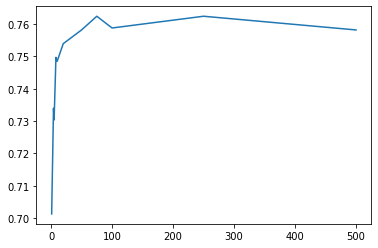

In [40]:
plt.plot(n_estimators_array, results)

*Looking for the highest spike on this graph*

In [41]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [63]:
rf = RandomForestClassifier(n_estimators=75, random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=75,
                                                    random_state=42),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [64]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}

In [65]:
forest = RandomForestClassifier(n_estimators=75, min_samples_leaf=2,max_features="auto", max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=75)

In [66]:
forestPredictions = forest.predict(x_test)
print(accuracy_score(y_test, forestPredictions))
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

0.7702539298669892
[[990 155]
 [225 284]]
              precision    recall  f1-score   support

          No       0.81      0.86      0.84      1145
         Yes       0.65      0.56      0.60       509

    accuracy                           0.77      1654
   macro avg       0.73      0.71      0.72      1654
weighted avg       0.76      0.77      0.77      1654



*Accuracy went up by about 2%*

## Looking at Feature Importance

In [67]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
feature_importances

TotalCharges        0.204863
tenure              0.184725
MonthlyCharges      0.139199
ContractR           0.114905
InternetServiceR    0.057328
PaymentR            0.057004
TechSupportR        0.037115
OnlineSecurityR     0.035430
PaperlessR          0.020410
GenderR             0.019631
OnlineBackupR       0.019574
SeniorCitizen       0.019092
PartnerR            0.017920
MoviesstreamingR    0.016949
TVstreamingR        0.016488
ProtectionR         0.016212
DependentsR         0.015832
PhoneServiceR       0.007325
dtype: float64

<AxesSubplot:>

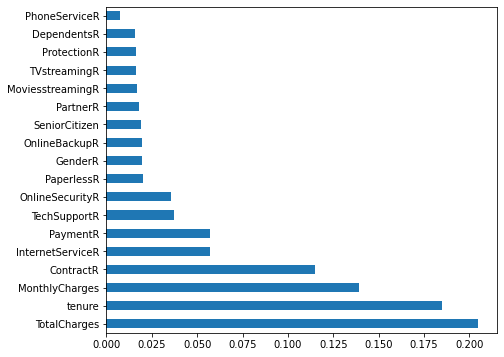

In [68]:
feature_importances.plot(kind='barh', figsize=(7,6))